In [2]:
%matplotlib inline

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pydicom
import os
import scipy.ndimage
import matplotlib.pyplot as plt

from skimage import measure, morphology
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# Some constants 
INPUT_FOLDER = 'data/train_images/4282019580/1547999333'

T1_FOLDER = 'data/train_images/998688940/2145914008'
T2_FOLDER = 'data/train_images/100206310/1012284084'

patients = os.listdir(INPUT_FOLDER)
patients.sort()

In [14]:
# Load the scans in given folder path
def load_scan(path):
    slices = [pydicom.read_file(path + '/' + s) for s in os.listdir(path)]
    slices.sort(key = lambda x: float(x.ImagePositionPatient[2]))
    try:
        slice_thickness = np.abs(slices[0].ImagePositionPatient[2] - slices[1].ImagePositionPatient[2])
    except:
        slice_thickness = np.abs(slices[0].SliceLocation - slices[1].SliceLocation)
        
    for s in slices:
        s.SliceThickness = slice_thickness
        
    return slices

In [15]:
slices = load_scan(INPUT_FOLDER)
image = [s.pixel_array for s in slices]


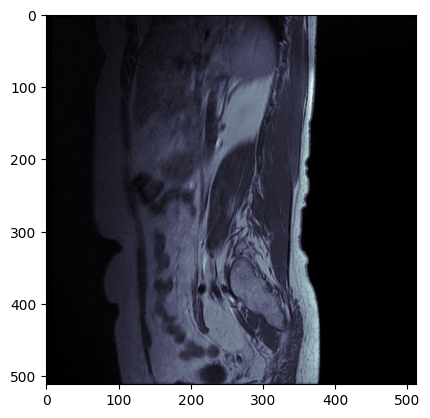

In [16]:
slices1 = load_scan(T1_FOLDER)
t1_image = [s.pixel_array for s in slices1]
plt.imshow(t1_image[0], cmap=plt.cm.bone)


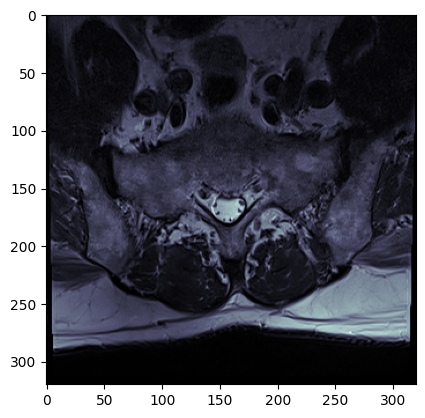

In [17]:
slices2 = load_scan(T2_FOLDER)
t2_image = [s.pixel_array for s in slices2]
plt.imshow(t2_image[0], cmap=plt.cm.bone)


In [6]:
path = 'data/train_images/2795583238/3365980706'
# 3637147606
files = os.listdir(path)
dcms = []
for dcm in [os.path.join(path, file) for file in files]:
    dcms.append(pydicom.dcmread(dcm))

dcms.sort(key = lambda x: float(x.InstanceNumber))
print(dcms[32])
for dcm in dcms:
    print(dcm.InstanceNumber, '    ', dcm.pixel_array.shape)

Dataset.file_meta -------------------------------
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Enhanced MR Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 2795583238.1.33
(0002, 0010) Transfer Syntax UID                 UI: RLE Lossless
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'PYDICOM 2.4.2'
-------------------------------------------------
(0008, 0018) SOP Instance UID                    UI: 2795583238.1.33
(0008, 0023) Content Date                        DA: '20240503'
(0008, 0033) Content Time                        TM: '223918.837546'
(0008, 103e) Series Description                  LO: 'T2'
(0010, 0020) Patient ID                          LO: '2795583238'
(0018, 0050) Slice Thickness                     DS: '4.0'
(0018, 0088) Spacing Between Slices              DS: '4.4'
(0018, 5100) Patient Position        